# Tarea 1 - Métodos Lineales para Regresión

## 1. Regresión Lineal Ordinaria (LSS) 

# a)

La línea número 4 se realiza para sacar del dataset las columnas con la información de id, date (fecha) y zipcode. Esto dado a que no entrega ninguna información para el estudio que se quiere realizar, que es predecir el precio de una casa.

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## b)

El dataset a utilizar corresponde a los atributos de una casa y el precio de cada una. Esto servirá para entrenar el modelo y poder predecir el precio de una casa con estos mismos atributos.

In [22]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## c)

La normalización que se realiza en la tercera línea del siguiente código a todos los datos es debido a que es más sencillo trabajar cuando todos tienen una escala en común. La transformación a la variable **price** aplicando el logaritmo es para diferenciarla de las otras variables. Además quedan números reales mayores a cero lo que facilita el análisis que corresponderá al output de la regresión lineal.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

## d)

El modelo lineal, dado un vector de atributos $X^T = (X_{1}, X_{2},...,X_{p})$, es posible predecir $Y$ gracias al modelo:

$$\hat{Y} = \hat{\beta_{0}} + \displaystyle\sum_{j=1}^{p} X_j \hat{\beta_j}$$

Por lo que, la conveniencia de la línea 4 es agregar a todos los vectores de atributos $ X $, un nuevo valor (atributo) $x_{0} = 1$, así se puede eliminar el intercepto con el eje $y$ de la función de regresión y se agrega al vector de coeficientes $\boldsymbol{\beta}$ como $\beta_{0}$, así el modelo queda simplemente:

$$\hat{Y} = X^T \hat{\beta}$$

Por lo tanto, es fácil notar que los argumentos que necesita la función es un vector $X$ con los atributos de la casa a estudiar y los coeficientes $\boldsymbol{\beta}$ que se obtienen a través de la técnica de los mínimos cuadrados.

In [24]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## e)

Los Z-scores miden el efecto de sacar una variable del modelo. Si se toma el 5% nivel de significancia, podemos observar que ni un valor es mayor a 2 en valor absoluto, con lo que se podría concluir que ni una variable es relevante.

In [25]:
# Primer método solo utilizando zscore como coeficientes/desviacion estandar
Betas = linreg.coef_ #Coeficientes
Xstd = Xtrain.std() #Desviacion Estandar
z = Betas/Xstd # Z-Score = Coeficientes/Desviacion Estandar


In [26]:
z

bedrooms        -0.008458
bathrooms        0.056819
sqft_living      0.058571
sqft_lot         0.021468
floors           0.039806
waterfront       0.033687
view             0.041575
condition        0.044218
grade            0.187856
sqft_above       0.048391
sqft_basement    0.031162
yr_built        -0.115237
yr_renovated     0.014344
lat              0.184683
long            -0.004128
sqft_living15    0.087478
sqft_lot15      -0.006879
intercept             inf
dtype: float64

## f)

## g)

Con validación cruzada con un $K=5$ se obtiene un error de $0.064690$, mientras que con $K=10$ este es levemente mejor $0.064683$. El error sobre el conjunto de pruebas es de $0.065259$.

In [27]:
from sklearn.model_selection import KFold

yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

def cv(Xm, ym, k):
    kf = KFold(n_splits=k)
    mse_cv = 0
    for train, val in kf.split(Xm):
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(Xm[train], ym[train])
        yhat_val = linreg.predict(Xm[val])
        mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
        mse_cv += mse_fold
    mse_cv = mse_cv / k
    return mse_cv

mse_10 = cv(Xm, ym, 10)
mse_5 = cv(Xm, ym, 5)
print (mse_10)
print (mse_5)
print (mse_test)

0.0646829054256
0.0646896867901
0.0652592512373


## h)

Tal como se ve en el gráfico de tipo quantile-quantile plot, se puede demostrar que es válido asumir que la diferencia de los errores del modelo se comportan como una distribución normal.

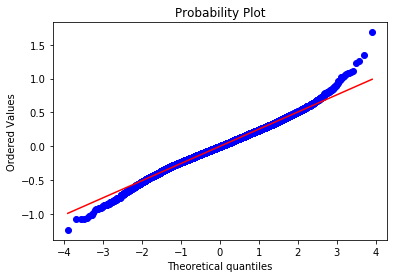

In [28]:
import matplotlib.pylab as plt
import scipy.stats as stats
import pylab

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

yhat_train = linreg.predict(Xm)
mse = yhat_train - ym

stats.probplot(mse, dist="norm", plot=pylab)
pylab.show()

## 2. Selección de atributos

## a)

Forward Step-wise Selection (FSS) comienza con el intercepto, y secuencialemnte agrega al modelo el predictor que mejora más el modelo. Esta técnica es considerada como un algoritmo greedy.

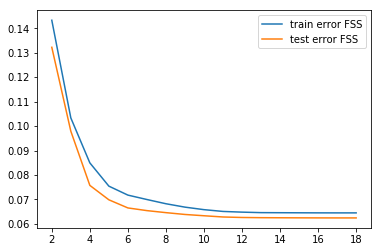

In [29]:
import matplotlib.pylab as plt

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

Xmt = Xtest.as_matrix()
ymt = ytest.as_matrix()

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    variables = []
    selected = [p]
    current_score = best_new_score = 0.0
    mse = []
    while remaining and len(selected)<=k :
        score_candidates = []
        score_candidates_test = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print "selected = %s ..."%names_x[best_candidate]
        #print "totalvars=%d, mse = %f"%(len(indexes), best_new_score)
        mse.append(best_new_score) # Necessary to plot train error
        variables.append(len(indexes))        
    return variables, mse

names_regressors = X.columns[:-1] #without intercept

variables1, mse_train = fss(Xm,ym,names_regressors)
variables2, mse_test = fss(Xmt, ymt,names_regressors)

ax = plt.gca()
ax.plot(variables1,mse_train,label='train error FSS')
ax.plot(variables2,mse_test,label='test error FSS')
plt.legend(loc=1)
plt.show()

## 3. Regularización

## a)

El método de Ridge Regression busca disminuir los coeficientes de la regresión imponiendo una penalidad $\lambda$ por su tamaño. Es por esto que la solución de la regresión Ridge estará dada por: 

$$\hat{\beta} = (X^T X + \lambda I)^{-1}X^Ty$$

Es por esto que entre mayor sea la penalidad $\lambda$ más se reducirán los coeficientes:
$$\lambda \to 0, \hat{\beta}^{Ridge} \to \hat{\beta}^{OLS}$$
$$\lambda \to \infty, \hat{\beta}^{Ridge} \to 0$$

Esto se puede ver en el gráfico del siguiente código, cuando la penalidad $\lambda$ es un número grande, en este caso $10^7$, las variables tienden a converger a cero (disminuyen). Mientras que cuando $\lambda$ tiene un valor menor, en este caso una penalidad de $10$, las variables siguen estando dispersas tal como en la regresión lineal ordinaria.

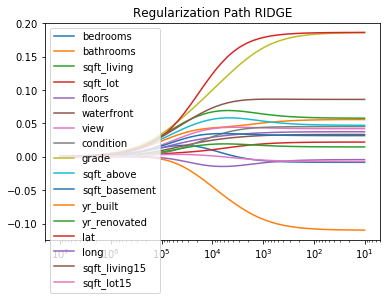

In [10]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## b)

Mientras que Ridge realiza una disminución propociornal a las variables, Lasso lo hace a través de una constante $\lambda$, truncando a $0$. Si se suponen dos variables $\beta_{1}$ y $\beta_{2}$ se tendrá que Lasso está sujeto a $|\beta{1}| + |\beta_{2}| \leq t$. Donde $t$ está directamente relacionado con $\lambda$. Por lo tanto, la solución de Lasso formará un diamante que tiene bordes (al contrario de la solución de Ridge que es un círculo), con lo que si la solución se encuentra en un borde un parámetro $\beta_{j}$ será igual a cero. Cuando la cantidad de variables es mayor a $2$, la figura que forma es un romboide con más esquinas, lo que conlleva a que haya una mayor probabilidad de la estimación de los parámetros a cero.

Es por esto, que se puede ver en el gráfico como los coeficientes no se comportan proporcionales como si se ve en Ridge. También se truncan más facilmente a cero algunas de estas para cierto $\lambda$, con lo que ayuda a saber que parámentros no deben ser considerados en la regresión. Dado esto, se puede decir que Lasso es más efectivo para seleccionar atributos ya que es capaz de decidir cuales son realmente importantes y otros que pueden ser desechados.

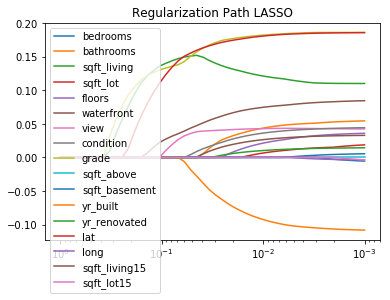

In [11]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## c)

Para el análisis de los errores se escoge Ridge debido a que este no elimina tán fácilmente los parámetros como lo hace Lasso, truncando a cero. Al ser un problema con pocos parámetros, nos podría interesar más mantener todos estos con algún cierto grado de coeficiente.

En el gráfico se puede apreciar como los errores se mantienen en un comienzo y luego descienden abruptamente entre $10^6$ y $10^4$. Esto coincide con el gráfico anterior que se vio de Ridge, en el cual los coeficientes se comenzaban a alejar de cero desde $10^5$. Por lo tanto, mientras menor sea $\lambda$ más se acercará a los valores originales obtenidos por la regresión lineal ordinaria.

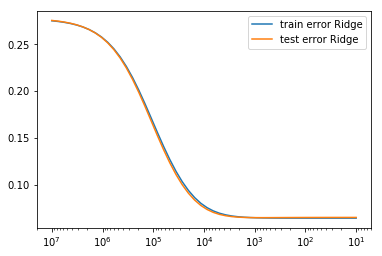

In [12]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error Ridge')
ax.plot(alphas_,mse_test,label='test error Ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## d)

Se debe considerar una técnica tal que sea posible escoger un factor $\lambda$ para así poder aplicar la técnica de Ridge Regression para perjudicar lo menor posible los errores finales. Gracias a validación cruzada es posible investigar esto, probando los distintos parámetros. Para este caso en particular, se puede apreciar en los resultados que cuando se llega a un parámetro de regularización $\lambda$ cercano $10^3$ los errores dejan de disminuir considerablemente. Esto también se comprueba cualitativamente en el gráfico mostrado en la pregunta anterior. El parámetro que más se acerca a esto de la muestra obtenida es: $\lambda = 910.298178$. También se puede llegar hasta el último valor que minimiza el error, el que es: $\lambda = 40.949151$.

In [13]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=10000000.000000, MSE(CV)=0.275499
BEST PARAMETER=7543120.063355, MSE(CV)=0.274855
BEST PARAMETER=5689866.029018, MSE(CV)=0.274008
BEST PARAMETER=4291934.260129, MSE(CV)=0.272894
BEST PARAMETER=3237457.542818, MSE(CV)=0.271436
BEST PARAMETER=2442053.094549, MSE(CV)=0.269531
BEST PARAMETER=1842069.969327, MSE(CV)=0.267057
BEST PARAMETER=1389495.494373, MSE(CV)=0.263865
BEST PARAMETER=1048113.134155, MSE(CV)=0.259777
BEST PARAMETER=790604.321091, MSE(CV)=0.254598
BEST PARAMETER=596362.331659, MSE(CV)=0.248125
BEST PARAMETER=449843.266897, MSE(CV)=0.240168
BEST PARAMETER=339322.177190, MSE(CV)=0.230586
BEST PARAMETER=255954.792270, MSE(CV)=0.219331
BEST PARAMETER=193069.772888, MSE(CV)=0.206492
BEST PARAMETER=145634.847750, MSE(CV)=0.192326
BEST PARAMETER=109854.114199, MSE(CV)=0.177258
BEST PARAMETER=82864.277285, MSE(CV)=0.161835
BEST PARAMETER=62505.519253, MSE(CV)=0.146650
BEST PARAMETER=47148.663635, MSE(CV)=0.132252
BEST PARAMETER=35564.803062, MSE(CV)=0.119077
BEST PA

## 4. Drift

In [14]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11)

df_A es extraido directamente de los datos, manteniendo su distribución mientras que df_B se genera intentando que en cada intervalo haya una cantidad similar de datos simulando una distribución uniforme.
En el tradicional modelo de machine learning el training y evaluación ocurren en el mismo dominio como en df_A, el problema que puede darse al realizar esto es al no tener suficientes datos etiquetados para el dominio que se quiere priorizar por lo que al querer utilizar un modelo para una tarea distinta con un label distinto (dominio) el modelo puede no dar buenos resultados.
El Transfer Learning aprovecha los datos que ya han sido utilizados almacenando el conocimiento obtenido de un modelo para aplicarlo en un nuevo modelo.


In [15]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

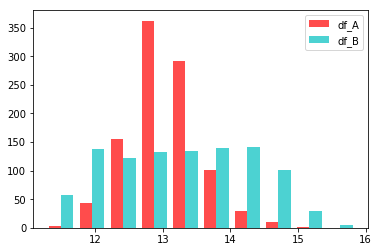

In [16]:
plt.hist([y_A, y_B],color=["r","c"],label=["df_A","df_B"],alpha=0.7)
plt.legend(loc='upper right')
plt.show()

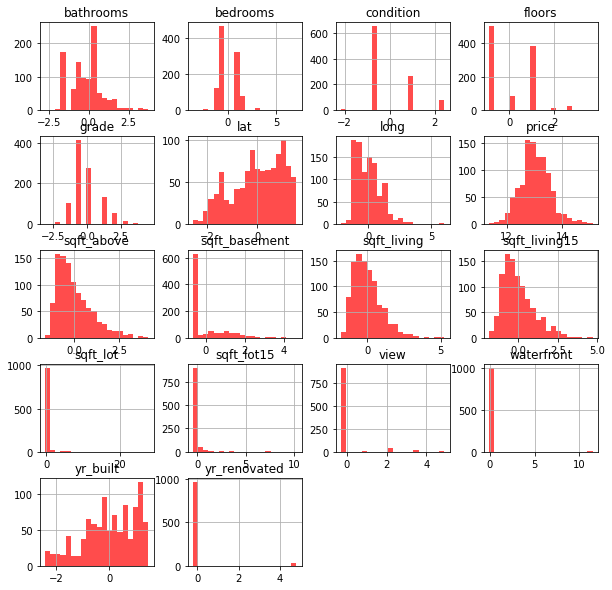

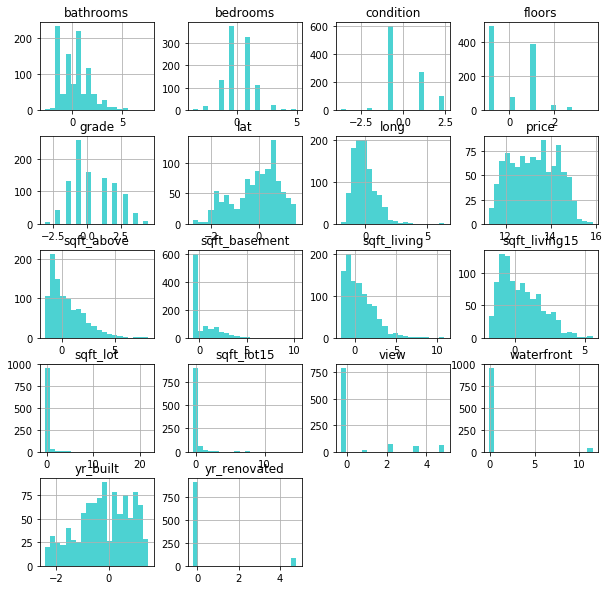

In [17]:
df_A.hist(color='r', alpha=0.7, bins=20,figsize=(10, 10))
df_B.hist(color='c', alpha=0.7, bins=20,figsize=(10, 10))
plt.show()

## 5. Detectar enfermedades cardíacas

## a)

In [18]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')

d = df['normal']

df.drop(['normal'],axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['max_heart'] = np.log(df['max_heart'])
y = df_scaled['max_heart']

df_scaled.drop(['max_heart'],axis=1,inplace=True)

X = df_scaled

N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))

#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

dtrain = d[istrain]
dtest = d[np.logical_not(istrain)]


## b)

Se crea la regresión lineal con los datos obtenidos de la pregunta anterior con un conjunto de entrenamiento representando el $70\%$ de los datos. El resto se utilizan para el conjunto de prueba. 

Creadas las predicciones $\hat{y}$ para ambos conjuntos de datos se calculan los respectivos errores. Se considera como umbral de decisión (outliers), para saber si una persona es probable de tener una enfermedad cardíaca, a las personas que esten sobre el percentil $83$ y bajo el percentil $17$ de los residuos del conjunto de entrenamiento. Esto se define luego de analizar cualitativamente el gráfico quantile-quantilo, donde bajo y sobre estos percentiles respectivamente los datos se desvían de la normal. Comparando esto con los datos reales se tiene una coincidencia de $61\%$ para el conjunto de entrenamiento y $63\%$ para el conjunto de pruebas. Esto, sin embargo, no se considera suficiente como para tomar una decisión acerca si una persona es propensa a tener una enfermedad cardíaca, con lo que se debería mejorar el modelo estudiando mejor los atributos y así analizando si se pueden reducir su complejidad dado que el conjunto de datos es reducido.

Score: 0.613757 
Score: 0.629630 


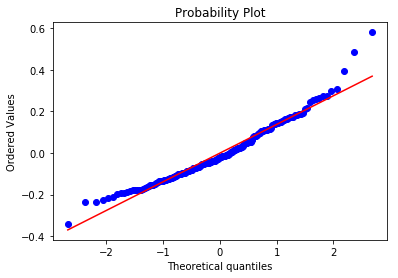

In [19]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

yhat_train = linreg.predict(Xm)
mse_train = yhat_train - ym

lim_inf = np.percentile(mse_train, 17)
lim_sup = np.percentile(mse_train, 83)

d_predicted_train = []

for i in mse_train:
    if i > lim_sup:
        d_predicted_train.append(2)
    elif i < lim_inf:
        d_predicted_train.append(2)
    else:
        d_predicted_train.append(1)

Xmt = Xtest.as_matrix()
ymt = ytest.as_matrix()

yhat_test = linreg.predict(Xmt)
mse_test = yhat_test - ymt

d_predicted_test = []

for i in mse_test:
    if i > lim_sup:
        d_predicted_test.append(2)
    elif i < lim_inf:
        d_predicted_test.append(2)
    else:
        d_predicted_test.append(1)
         
from sklearn.metrics import accuracy_score
print "Score: %f "%(accuracy_score(dtrain.as_matrix(), d_predicted_train))
print "Score: %f "%(accuracy_score(dtest.as_matrix(), d_predicted_test))

stats.probplot(mse_train, dist="norm", plot=pylab)
pylab.show()